In [24]:
%%html
<img src="analyze.png", width=700, height=500>

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

(1)What is the independent variable?
>**Answer: while the independent is the variable that is changed or controlled (different conceptual conditions)**

What is the dependent variable?
>**Answer:the dependent variable represents the output or outcome of the experiment (response time)**


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


**The null hypotheses that, there are no difference in time taken for both cases congruent  and incongruent.**

>**$ Null :H_{0}: μC = μI $** 


>**$Alternative : H_{1} : μI > μC $**

 **Alternative hypotheses is that, there is an increase in times when the colors are incongruen.**
 
 **where μC**: is the population means time of (Congruent).
 
 **μI**:  is the population means time of (Incongruent).
 
   - The sample size is less than 30 (sample size = 24)
   - The same participant is measured at two time points.

**Since The same participant is measured at two time points. Therefore, we will conduct a dependent t-test which is look for "changes" between means when the participants are measured on the same dependent variable, but at two time points.**

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
# Perform the analysis here
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(12,7)

In [4]:
df = pd.read_csv('stroopdata.csv')

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [5]:
sns.set()
sns.set_context("paper")

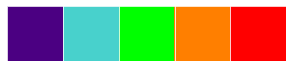

In [20]:
my_palette = ['#4b0082', '#48d1cc', '#00FF00', '#FF7F00', '#FF0000']
sns.set_palette(my_palette)
sns.palplot(sns.color_palette())

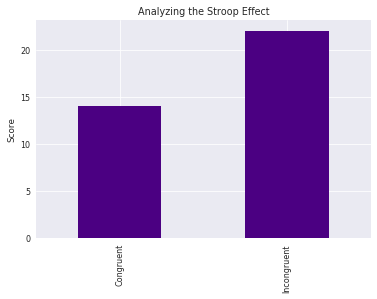

In [17]:
# Build the visualizations here
Incongruent = df['Incongruent'].values.tolist()

Congruent = df['Congruent'].values.tolist()
df.mean().plot('bar');
plt.title('Analyzing the Stroop Effect');
plt.ylabel("Score");
sns.set()
sns.set_context("paper")

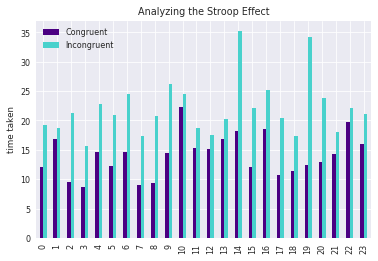

In [21]:
plt.figure(figsize=(12,6))
df.plot.bar();
plt.title('Analyzing the Stroop Effect');
plt.ylabel("time taken");

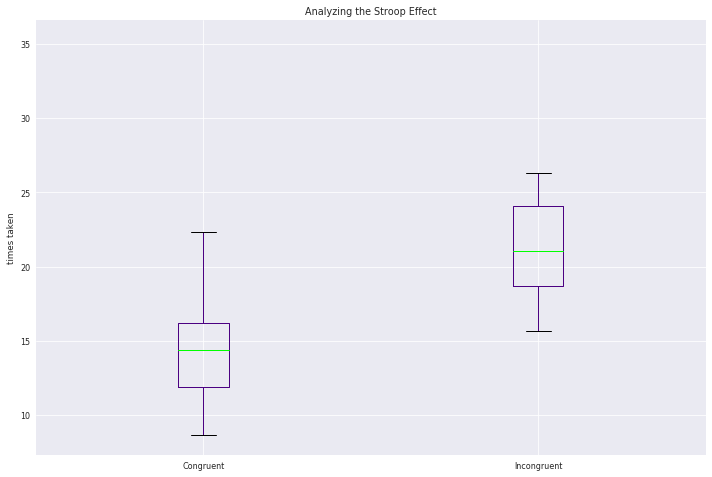

In [22]:
df.plot(kind='box', figsize=(12,8))
plt.title("Analyzing the Stroop Effect")
plt.ylabel("times taken")
plt.show()

>## From the visualizations above, we can see that , the  times under incongruent conditions are more high than under congruent conditions.
>## However, we should use testing to define if it has significant statistical or not.


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [11]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [12]:
std_Congruent = df.Congruent.std()
std_Incongruent = df.Incongruent.std()
mean_Congruent = df.Congruent.mean()
mean_Incongruent = df.Incongruent.mean()
print("STD of Congruent = {}".format(std_Congruent))
print("STD of Incongruent = {}".format(std_Incongruent))
print("Mean of Congruent = {}".format(mean_Congruent))
print("Mean of Incongruent = {}".format(mean_Incongruent))



STD of Congruent = 3.5593579576451955
STD of Incongruent = 4.797057122469138
Mean of Congruent = 14.051124999999999
Mean of Incongruent = 22.015916666666666




**Bsed on this result above, we found that Incongruent  recorded highest rate of mean and STD**


In [15]:
from scipy.stats import ttest_rel
ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

>###        Based on the results above, $P_{VALUE}$ = 4.1030005857111781e-08 is less than 0.05($\alpha$),
>### and $t_{statistic}$ = 8.020706944109957 is clearly higher than the negative   $t_{critical}$ =±2.069.

>### Therefore we reject the Null Hypothesis with a 99% Confidence level.
>### There is a significant difference  among the time that participant takes to figure out the color under congruent and incongruent conditions


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

"What this reveals is that the brain can’t help but read. As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer."

"The Stroop effect refers to our tendency to experience difficulty (conflict or interference) naming a physical colour (we use the term ‘hue’) when it is used to spell the name of a different colour (the incongruity effect), but not when we simply read out colour words (Stroop, 1935). The RT difference between a neutral condition (e.g., a block of colour or using a hue to spell a non‐colour word) and the above conflict condition is a more recent measure of interference, partly because the subtraction of one condition from another acts to reduce or eliminate the influence of general motor responses on the interference measure." 

>### Finally, after visualizing charts, and statistical computing , we can say that, the outcome correspond with our expectations. Furthermore, there is a statistically significant difference in the times taken to execute the incongruent test compared to the congruent test.



## Resources 


- https://www.investopedia.com/terms/t/t-test.asp
- https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5516206/
- https://imotions.com/blog/the-stroop-effect/
